<a href="https://colab.research.google.com/github/fransindi/Books_prediction/blob/master/books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediccion de rating de libros
En este notebook exploraremos un dataset de libros y utilizaremos regresion lineal para predecir el rating de los mismos. Las secciones de este analisis incluyen.

1. Exploracion de los datos
2. Limpieza de los datos
3. Visualizacion de los datos
4. Preprocesamiento de los datos
5. Machine learning.

In [176]:
# importamos drive para leer los archivos.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
# importamos librerias necesarias para lectura, preprocesamiento, imputacion y machine learning.
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('deep')
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
import math

In [178]:
archivo_libros = "/content/drive/MyDrive/Colab Notebooks/goodread-books/books.csv"
df = pd.read_csv(archivo_libros, error_bad_lines=False)
df.head()

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# Exploracion de los datos

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Posee tanto variables categoricas como numericas.

In [180]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [181]:
df = df.rename(columns={"  num_pages": "num_pages"})
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [182]:
df.shape

(11123, 12)

# Limpieza de los datos

In [183]:
df.duplicated().any()

False

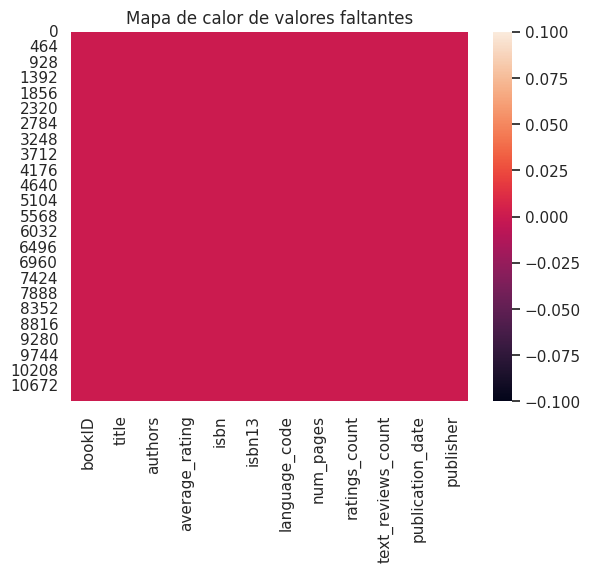

In [184]:
sns.heatmap(df.isnull())
plt.title("Mapa de calor de valores faltantes")
plt.show()

No hay duplicados ni valores faltantes.


# Visualizacion de datos


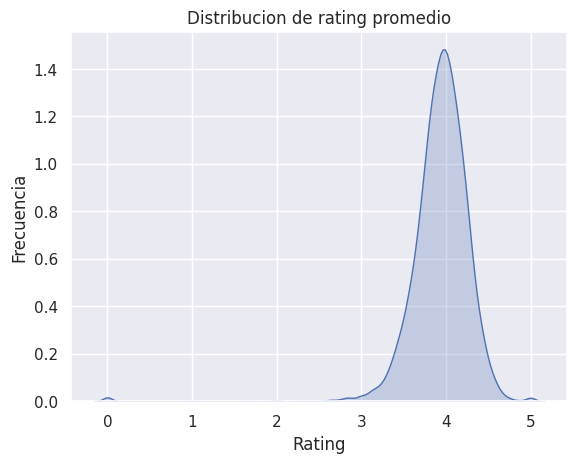

In [185]:
sns.kdeplot(df["average_rating"], shade=True)
plt.title("Distribucion de rating promedio")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

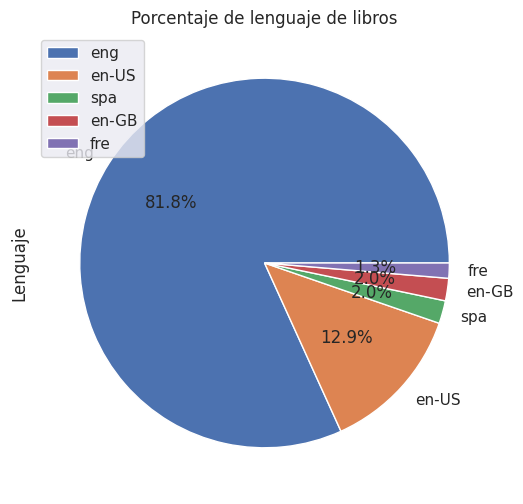

In [186]:
df["language_code"].value_counts().head(5).plot(kind="pie", autopct="%1.1f%%", figsize=(6,6)).legend()
plt.title("Porcentaje de lenguaje de libros")
plt.ylabel("Lenguaje")
plt.show()

Hay un 94.7% de libros en ingles, por lo que la variable es casi constante.

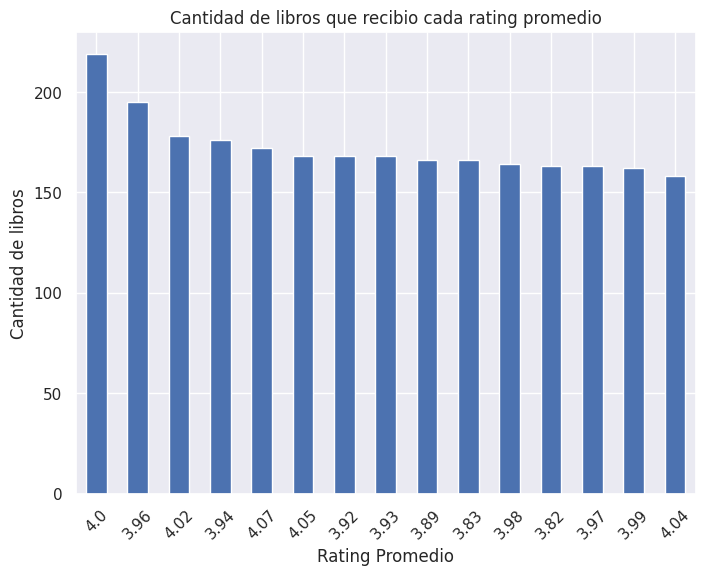

In [187]:
top_15_average_rating = df["average_rating"].value_counts().head(15)
top_15_average_rating.plot(kind="bar", figsize=(8,6))
plt.xticks(rotation=45)
plt.title("Cantidad de libros que recibio cada rating promedio")
plt.ylabel("Cantidad de libros")
plt.xlabel("Rating Promedio")
plt.show()

Los promedios de rating mas frecuentes se dan entre los 3.82 y 4.07


[]

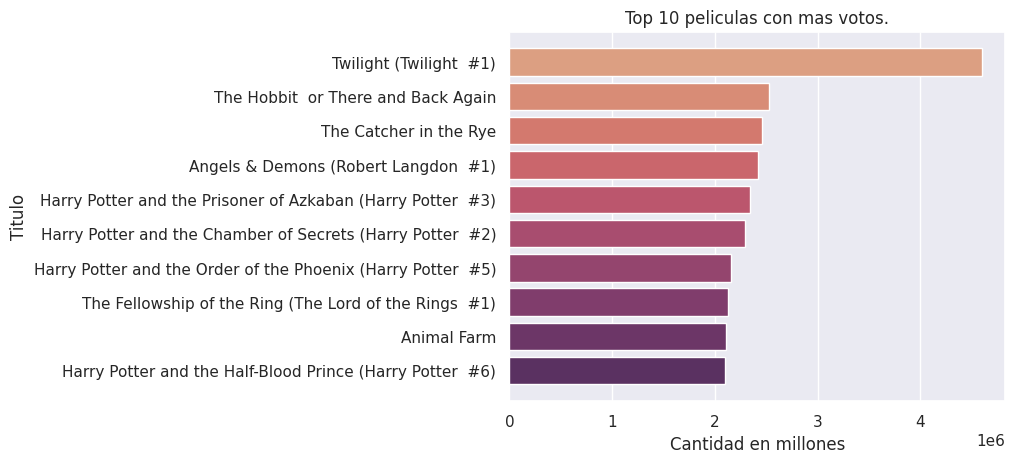

In [188]:
libros_populares = df.nlargest(10, ["ratings_count"]).set_index("title")["ratings_count"]
sns.barplot(x=libros_populares, y=libros_populares.index, palette="flare")
plt.title("Top 10 peliculas con mas votos.")
plt.ylabel("Titulo")
plt.xlabel("Cantidad en millones")
plt.plot()

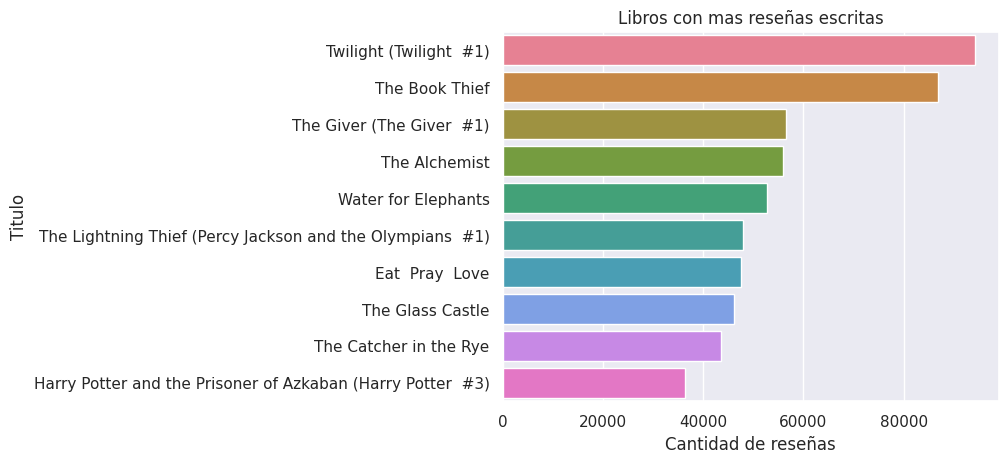

In [189]:
libros_mas_resenias = df.nlargest(10, ["text_reviews_count"]).set_index("title")["text_reviews_count"]
sns.barplot(x=libros_mas_resenias, y=libros_mas_resenias.index, palette="husl")
plt.title("Libros con mas reseñas escritas")
plt.xlabel("Cantidad de reseñas")
plt.ylabel("Titulo")
plt.show()

[]

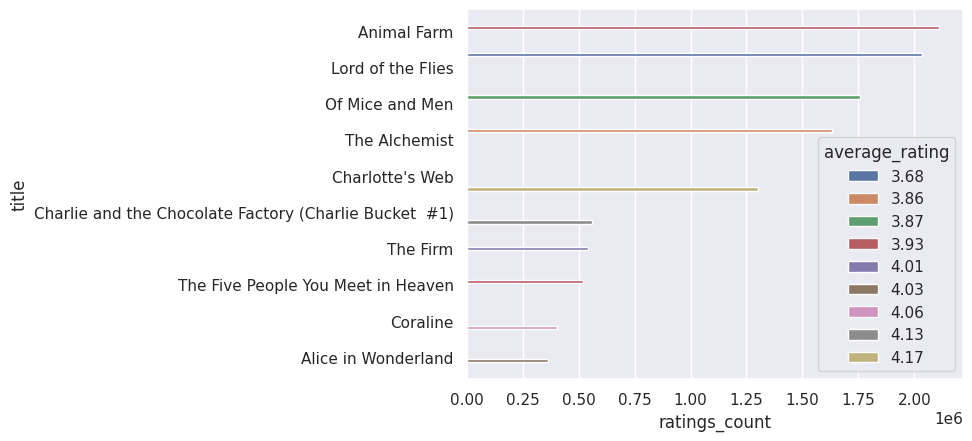

In [190]:
under_200_pages = df[df["num_pages"] <= 200]
top_10_under_200 = under_200_pages.nlargest(10, ["ratings_count"])
sns.barplot(x=top_10_under_200["ratings_count"], y=top_10_under_200["title"], hue=top_10_under_200["average_rating"])
plt.plot()

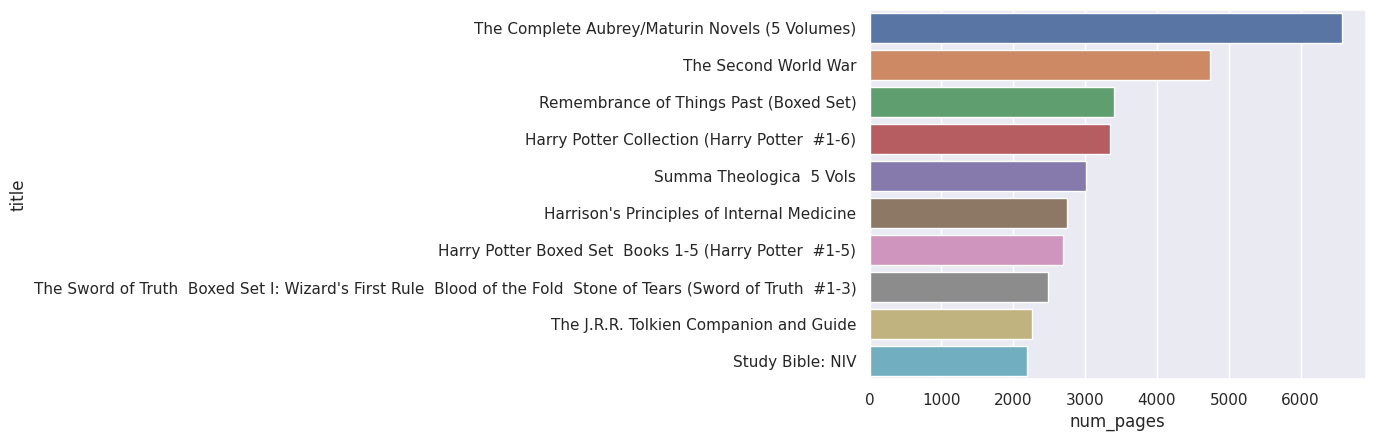

In [191]:
libros_muchas_paginas = df.nlargest(10, ["num_pages"]).set_index("title")["num_pages"]
sns.barplot(x=libros_muchas_paginas, y=libros_muchas_paginas.index)
plt.show()

In [192]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

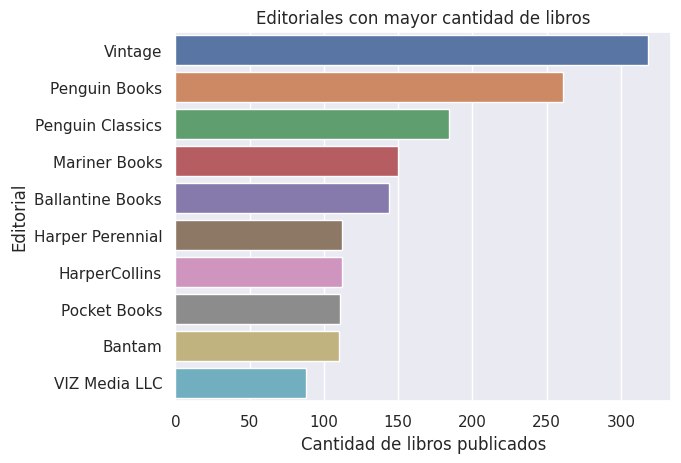

In [193]:
top_10_publisher = df.publisher.value_counts().head(10)
sns.barplot(x=top_10_publisher, y=top_10_publisher.index)
plt.title("Editoriales con mayor cantidad de libros")
plt.ylabel("Editorial")
plt.xlabel("Cantidad de libros publicados")
plt.show()

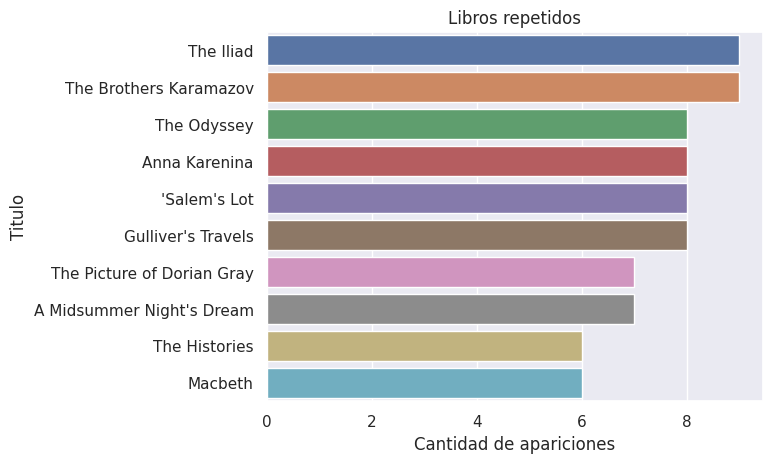

In [194]:
titulos_repetidos = df.title.value_counts().head(10)
sns.barplot(x=titulos_repetidos, y=titulos_repetidos.index)
plt.title("Libros repetidos")
plt.xlabel("Cantidad de apariciones")
plt.ylabel("Titulo")
plt.show()

In [195]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

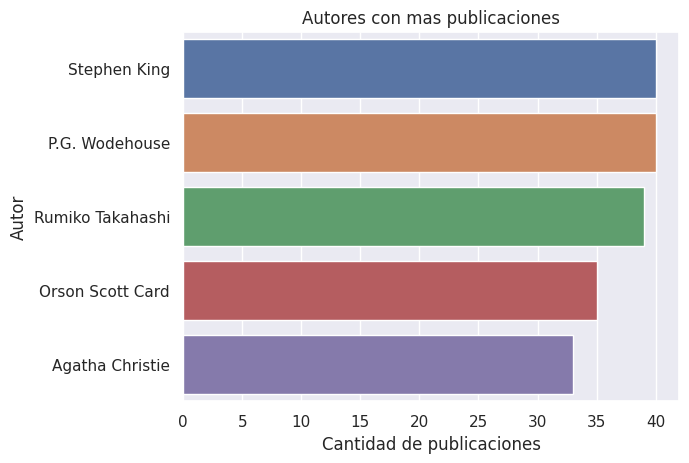

In [196]:

top_autores_publicaciones = df.authors.value_counts().head(5)
sns.barplot(x=top_autores_publicaciones, y=top_autores_publicaciones.index)
plt.title("Autores con mas publicaciones")
plt.xlabel("Cantidad de publicaciones")
plt.ylabel("Autor")
plt.show()

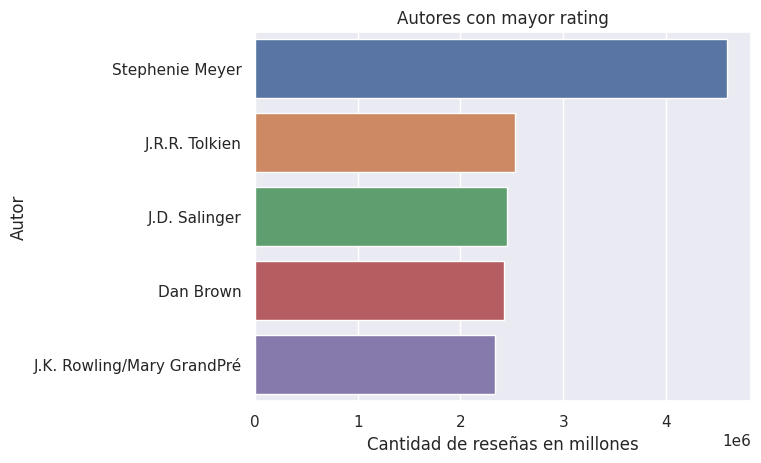

In [197]:
top_autores_rating = df.nlargest(5, ["ratings_count"]).set_index("authors")
sns.barplot(x=top_autores_rating["ratings_count"], y=top_autores_rating.index)
plt.title("Autores con mayor rating")
plt.ylabel("Autor")
plt.xlabel("Cantidad de reseñas en millones")
plt.show()

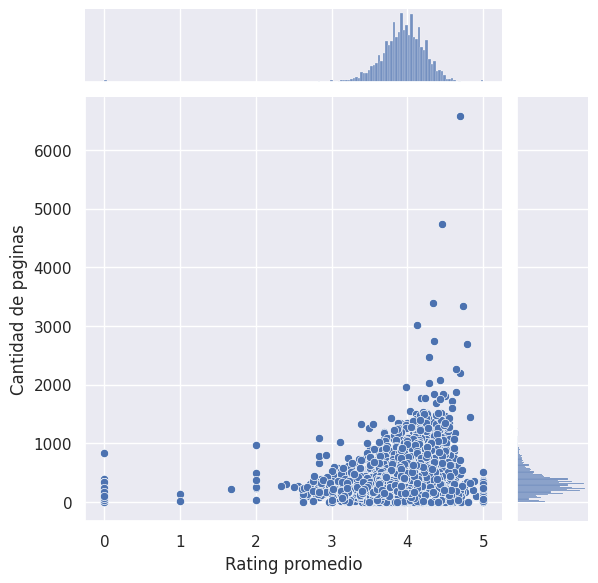

In [198]:
sns.jointplot(x = "average_rating", y= "num_pages", data=df)
plt.xlabel("Rating promedio")
plt.ylabel("Cantidad de paginas")
plt.show()

Text(0.5, 32.249999999999986, '')

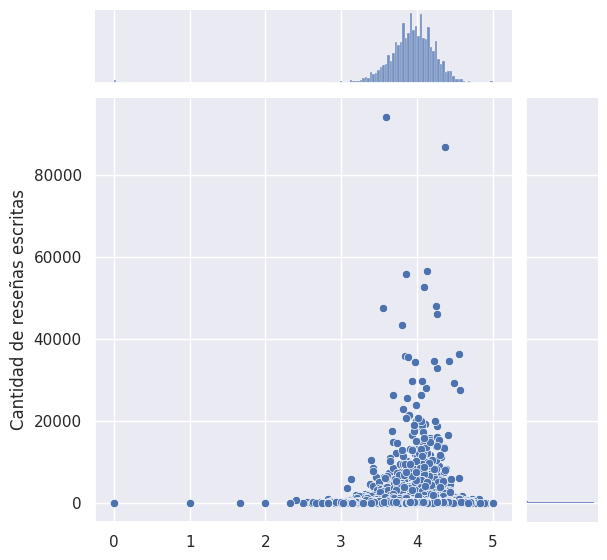

In [199]:
sns.jointplot(x="average_rating", y="text_reviews_count", data=df)
plt.ylabel("Cantidad de reseñas escritas")
plt.xlabel("")

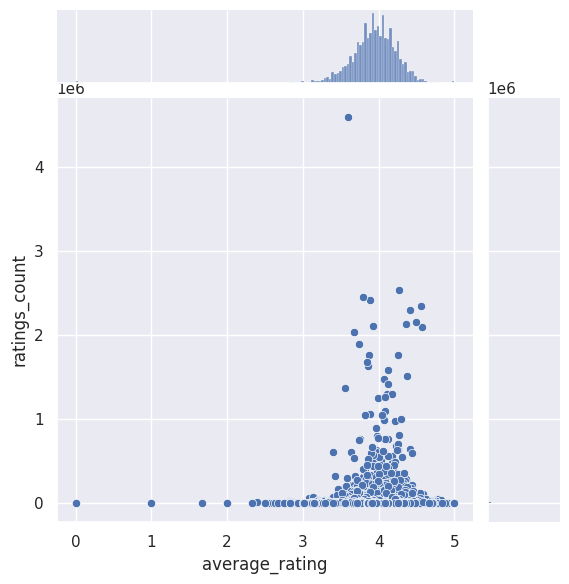

In [200]:
sns.jointplot(x="average_rating", y="ratings_count", data=df)

# Preprocesamiento de los datos.

El preprocesamiento consiste en convertir los datos de lectura para humanos a numeros para que el modelo pueda interpretarlos.

Nuestro principal objetivo va a ser eliminar outliers y convertir las columnas no legibles por el algoritmo

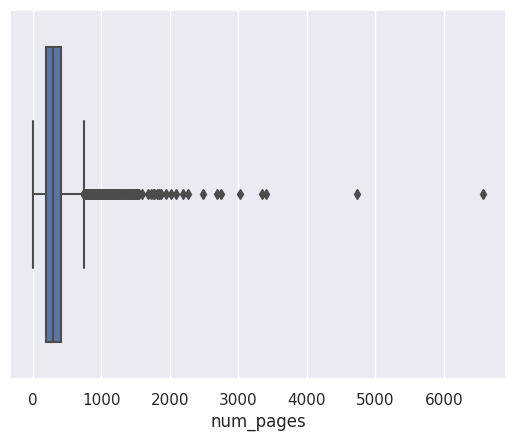

In [201]:
sns.boxplot(x=df['num_pages'])
plt.show()

Podemos entender que los outliers van a partir de los 1000 hasta las 6000 paginas, vamos a quitar estos valores

In [202]:
df = df.drop(df.index[df["num_pages"] >= 1000])

In [203]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

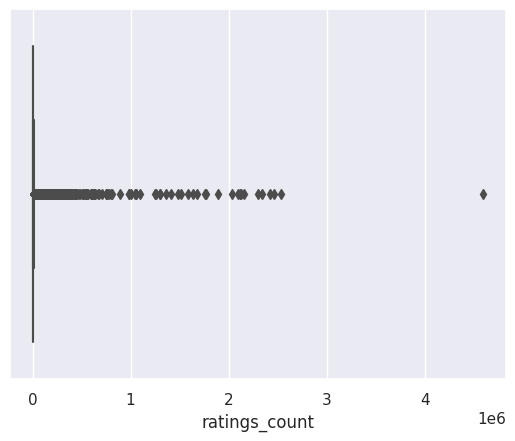

In [204]:
sns.boxplot(x="ratings_count", data=df)
plt.show()

El grafico nos indica que casi todos los datos son outliers. Tomemos a partir del millon como outliers.

In [205]:
df = df.drop(df.index[df["ratings_count"] >= 1000000])

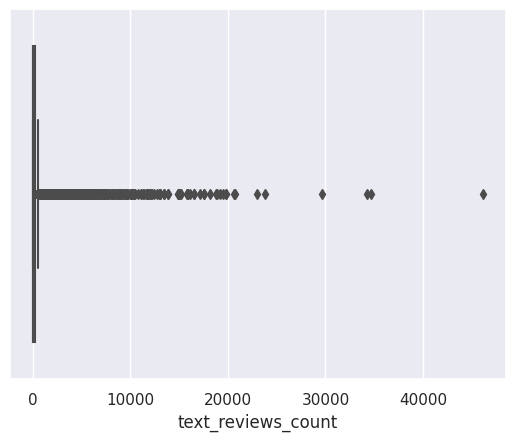

In [206]:
sns.boxplot(x="text_reviews_count", data=df)
plt.show()

Este grafico expresa tambien casi todos los datos como outliers, tomemos los datos menores a 20000 reviews

In [207]:
df = df.drop(df.index[df["text_reviews_count"] >= 20000])

## Label encoding

In [208]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [209]:
# instanciamos el labelEncoder
lp = preprocessing.LabelEncoder()

In [210]:
# encode de title
df["title"] = lp.fit_transform(df["title"])

In [211]:
# encode de authors
df["authors"] = lp.fit_transform(df["authors"])

In [212]:
#encode de publisher
df["publisher"] = lp.fit_transform(df["publisher"])

In [213]:
# encode de language_code
language_encoding = pd.get_dummies(df["language_code"])
df = pd.concat([df, language_encoding], axis=1)


# Machine Learning

El objetivo de esta seccion es crear un modelo de regresion lineal para predecir el rating de lo libros. La regresion lineal es un algoritmo de analisis predictivo basico. Hay 2 tipos de variables en una regresion lineal.
1. La entrada o variable predictora es la variable(s) que nos ayudan a predecir la variable objetivo, nos referimos a ella como **X**
2. La variable de salida es la columna a predecir y nos referimos a ella como **Y**

In [214]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'ale', 'ara', 'en-CA', 'en-GB',
       'en-US', 'eng', 'enm', 'fre', 'ger', 'gla', 'glg', 'grc', 'ita', 'jpn',
       'lat', 'msa', 'mul', 'nl', 'nor', 'por', 'rus', 'spa', 'srp', 'swe',
       'tur', 'wel', 'zho'],
      dtype='object')

In [215]:
# dividimos los datos entre atributos y etiquetas.
X = df.drop(["average_rating", "language_code", "isbn", "publication_date"], axis=1)
y = df["average_rating"]

Los atributos son las variables independientes, mientras que las etiquetas son variables dependientes las cuales pueden ser predecidas.

In [216]:
# dividimos los datos en 80% para el set de entrenamiento y 20% para el set de testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 48)

El parametro test_size es el que indica el tamaño para el set de testeo. Ahora debemos instanciar el modelo de regresion lineal y luego utilizar fit() para entrenarlo con el conjunto de entrenamiento


In [217]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Ahora tomamos las predicciones sobre el set de testeo *X_test*

In [219]:
predictions = lr.predict(X_test)

Comparamos las predicciones con los valores reales.

In [220]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Prediccion': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Prediccion
0,4.02,4.123063
1,3.88,3.924690
2,4.26,4.029594
3,3.98,4.024534
4,3.99,3.919775
5,4.23,3.922161
6,3.83,3.848748
7,3.72,3.939739
8,4.11,3.931271
9,4.09,3.907698


<Axes: >

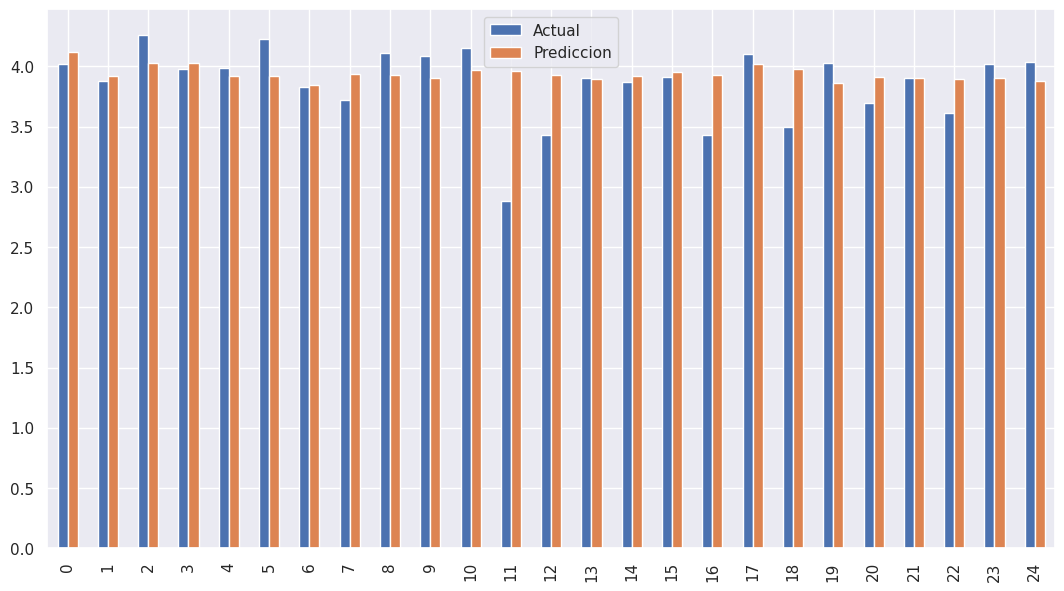

In [221]:
# Visualizamos para comparar la prediccion con el actual
pred.plot(kind='bar', figsize=(13, 7))

Aunque el modelo no es muy preciso, conserva valores similares a los originales.

In [222]:
# Evaluamos la calidad del algoritmo
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.231762801058958
MSE: 0.12281694146150943
RMSE: 0.3504524810320358
